In [1]:
from script import *
import matplotlib.pyplot as plt
import pandas as pd


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [70]:
def plot_timings(timings_l):
    for tim in timings_l:
        plt.axvline(x=tim, color='gray', linestyle='--')
    
    plt.axhline(y=0, color='gray', linestyle='--')

In [2]:
def save_data(path, data):
    data = [data[0], data[1][0], data[1][1], data[2][0], data[2][1], data[3]]
    headers_l = ['Time', 'LeftHip', 'RightHip', 'LeftKnee', 'RightKnee', 'Spine']
    data_d = dict.fromkeys(headers_l)
    data_d = {header: timeseries for header, timeseries in zip(headers_l, data)}
    data_df = pd.DataFrame.from_dict(data_d)
    with open(path, 'w') as new_csv:
        data_df.to_csv(new_csv)
    
    return data_df

In [41]:
def cut_data(data, start, end):
    lhip, rhip = get_joints(data, 'hip')
    lknee, rknee = get_joints(data, 'knee')
    spine = get_joints(data, 'spine')
    time = get_time(data)
    start_idx, end_idx = get_nearest(time, start), get_nearest(time, end)
    n_time = time[start_idx:end_idx]
    n_lhip, n_rhip = lhip[start_idx:end_idx], rhip[start_idx:end_idx]
    n_lknee, n_rknee = lknee[start_idx:end_idx], rknee[start_idx:end_idx]
    n_spine = spine[start_idx:end_idx]
    return n_time, (-n_lhip, -n_rhip), (n_lknee, n_rknee), n_spine

In [4]:
first_name = 'Ancheev/AncheevFirst.csv'
first_data = read_data(first_name)

Данные после очистки

In [5]:
first_data = cut_data(first_data, 3.5, 8.4)
f_time, f_hip, f_knee, f_spine = first_data

In [10]:
first_cutted_df = save_data('AncheevFirstCutted.csv', first_data)
first_cutted_df.head()

,Time,LeftHip,RightHip,LeftKnee,RightKnee,Spine
0,3.495,22.263796,-20.945932,15.250536,23.606758,101.13
1,3.527,22.045788,-20.074959,16.530581,23.478878,101.15
2,3.561,20.911877,-18.654059,19.045285,22.808296,101.26
3,3.597,19.214916,-17.086887,21.870109,21.858975,101.41
4,3.628,16.941175,-15.244514,25.346675,20.557546,101.61


<IPython.core.display.Javascript object>


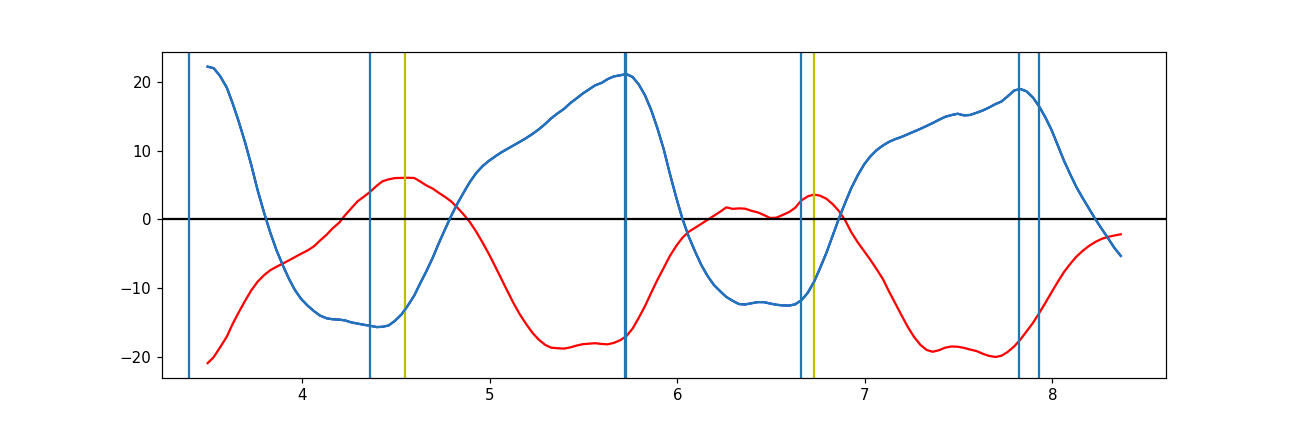

In [6]:
%matplotlib notebook
plt.figure(figsize=(12,4))
plt.plot(f_time, f_hip[0], 'b', label='Левый')
plt.plot(f_time, f_hip[1], 'r', label='Правый')
plt.axvline(x=5.72)
plt.axvline(x=7.82)
plt.axvline(x=4.55, color='y')
plt.axvline(x=6.73, color='y')
plt.axhline(y=0, color='black')
plt.grid()

## Первый раз
Левая нога:
3,394 - 4,361   5,728 - 6,661   7,930 - 
Правая нога: 


In [7]:
f_timings = [3.394, 4.361, 5.728, 6.661, 7.930]

### Второй раз:

Правая нога: 2,652 - 3,585   4,352 - 5,251   6,217

In [47]:
s_timings = [2.652, 3.585, 4.352, 5.251, 6.217]

### Третий раз: 

Правая нога: 1,622 - 2,389   3,023 - 3,687   4,289 - 4,888

In [48]:
th_timings = [1.622, 2.389, 3.023, 3.687, 4.289, 4.888]

## Первый раз, фазовые из Хабилекта

<IPython.core.display.Javascript object>


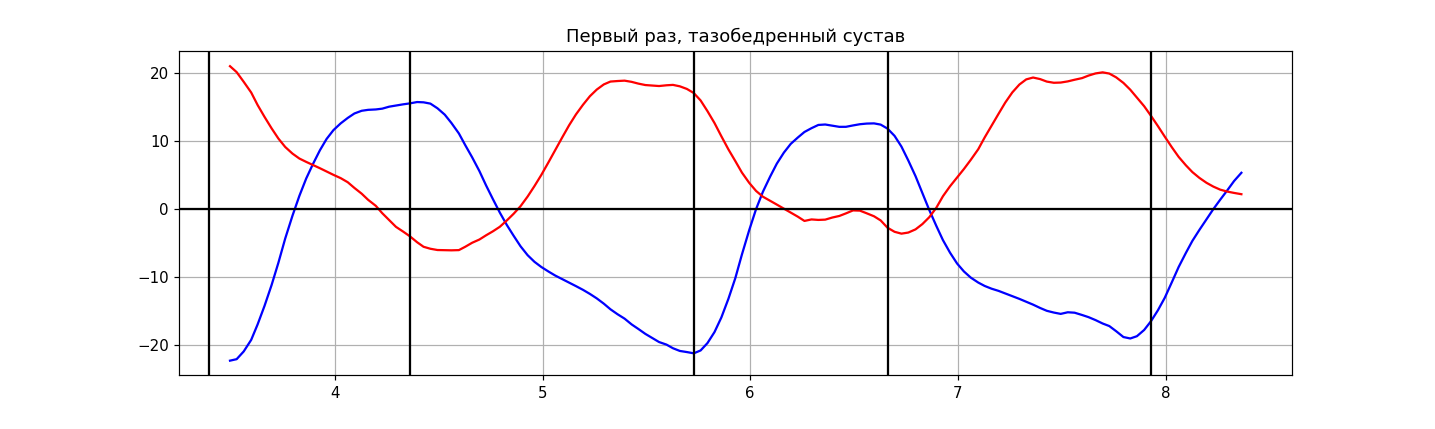

In [38]:
%matplotlib notebook

plt.plot(f_time, f_hip[0], 'b', label='левый')
plt.plot(f_time, f_hip[1], 'r', label='правый')
plt.title('Первый раз, тазобедренный сустав')
for timing in f_timings:
    plt.axvline(x=timing, color='black')

plt.axhline(y=0, color='black', drawStyle='steps')
plt.grid()

### Экстремальные значения:
Тазобедренный сустав:    
Левый -   22.56, -15.8, 21.3, -12.6, 19.2     
Правый - -21, 6.4, -19, 4.4, -20
    
Вывод: амплитудные значения левой конечности незначительно отличаются от нормативных показателей. Движение правой конечности смещено в область разгибания, также снижен диапазон (*разница между максимумом сгибания и разгибания*)


Опираясь только лишь на амплитудные значения можно сделать вывод о *догоняющей* роли правой нижней конечности, левая сторона практически полностью берет на себя задачу перемещения ОЦМ вперёд, правая сторона лишь соответствует совершаемым локомоциям.

### Анализ изменений структуры элементов гониограмм:
**Левая сторона:** разгибание, фаза опоры (до начала периода двойной опоры) - двухскоростной режим, высокая скорость разгибания после контакта пяткой угасает и примерно половину времени разгибания происходит замедленно, а во втором цикле скорость падает до нуля (*как будто бы преодолевая сопротивление, внутреннее или внешнее*)
    Период переноса, длительное сгибание до максиальной амплитуды (соответствует контакту пятки следующего цикла шага) - также двухскоростной режим, изначально высокая скорость разгибания, затем снижение (не настолько значительное, как при разгибании) скорости


**Правая сторона:** гониграмму правой стороный можно в целом описать двумя свойствами - смещение диапазона в сторону разгибания (1), элементы кривой соответствующие опоре и переносу в норме представленные плавными кривыми, сменяются кривыми сгибание-торможение (скорость неизменна)  *выглядит, как предельный случай двускоростного режима*
        
        

#### Что за двухскоростной режим?
Гипотезы о двухскоростном режиме
    Реакция на новые обстоятельства 
    Новая программа движений (должна быть оптимальна для новых условий)
    
 *Для того, чтобы разобраться с двухскоростным режимом, возможно, требуется посмотреть на наклон туловища*

<IPython.core.display.Javascript object>


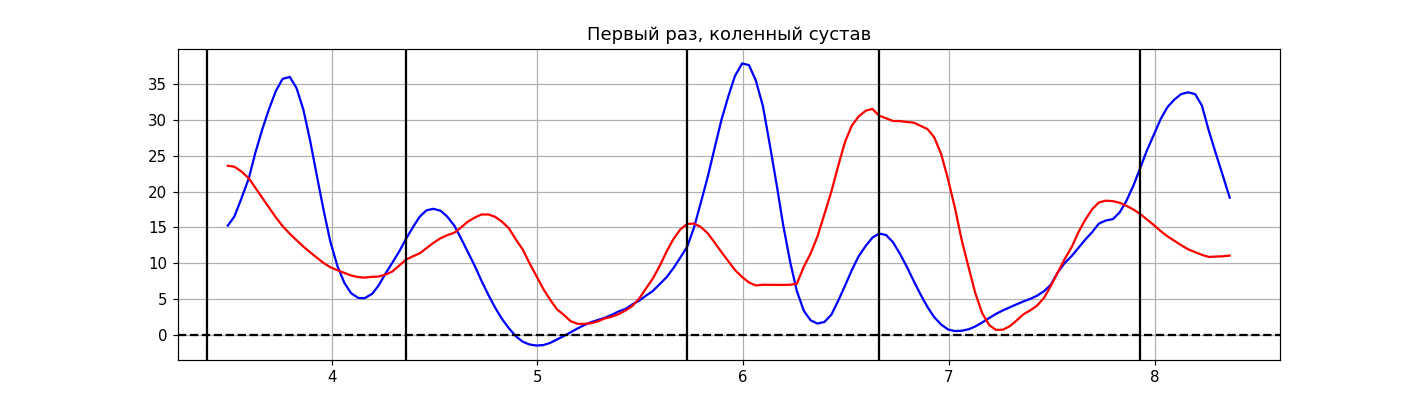

In [40]:
%matplotlib notebook
plt.title('Первый раз, коленный сустав')
plt.plot(f_time, f_knee[0], 'b')
plt.plot(f_time, f_knee[1], 'r')
for timing in f_timings:
    plt.axvline(x=timing, color='black')
plt.grid()
plt.axhline(y=0, color='black', linestyle='--')

**Коленный сустав:**    
Левая сторона демонстрирует способность производить нормальный паттерн.(*возможно, с более высокими амплитудами*)    
Правая сторона совершает несколько различных по форме и по амплитуде сгибаний-разгибаний.

<IPython.core.display.Javascript object>


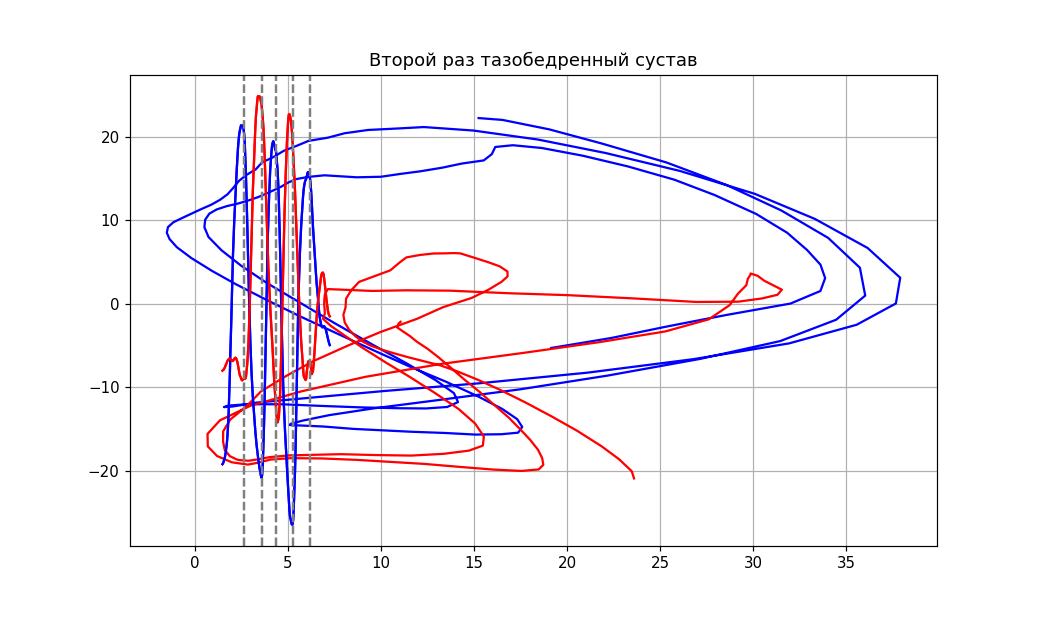

In [42]:
%matplotlib notebook
plt.plot(f_knee[0], f_hip[0], 'b', label='левая')
plt.plot(f_knee[1], f_hip[1], 'r', label='правая')
plt.grid()

In [43]:
s_name = 'Ancheev/AncheevSec.csv'
s_data = read_data(s_name)

In [49]:
s_time, s_hip, s_knee, s_spine = cut_data(s_data, 1.5, 7.3)

<IPython.core.display.Javascript object>


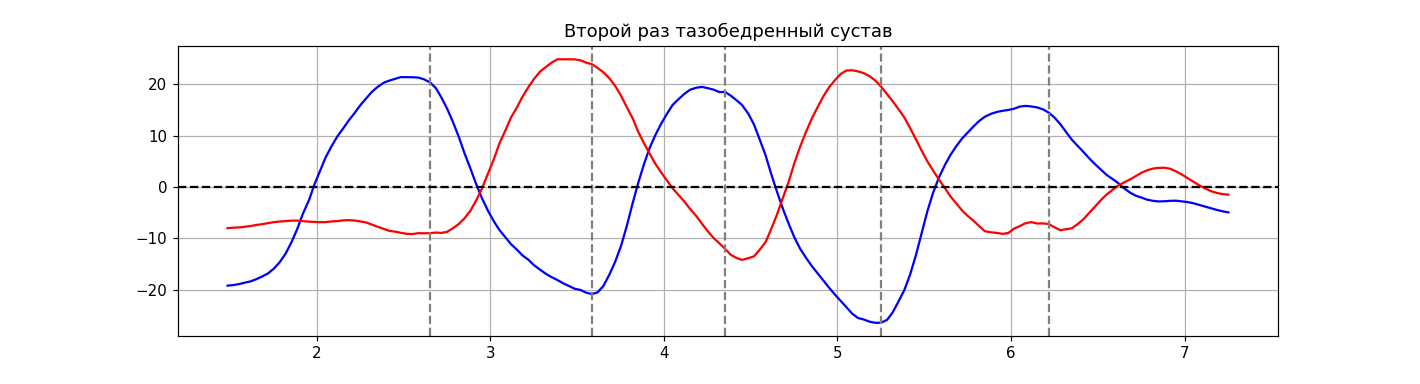

In [58]:
%matplotlib notebook
plt.title('Второй раз тазобедренный сустав')
plt.plot(s_time, s_hip[0], 'b')
plt.plot(s_time, s_hip[1], 'r')
plt.grid()
for timing in s_timings:
    plt.axvline(x=timing, color='gray', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--')

**Тазобедренный сустав**    
Ситуация с двухскоростным режимом улучшилась, пропали периоды с "нулевой" скоростью.    
Для правой стороны значительно лучше ситуация с разгибанием (максимум - -14 градусов)

<IPython.core.display.Javascript object>


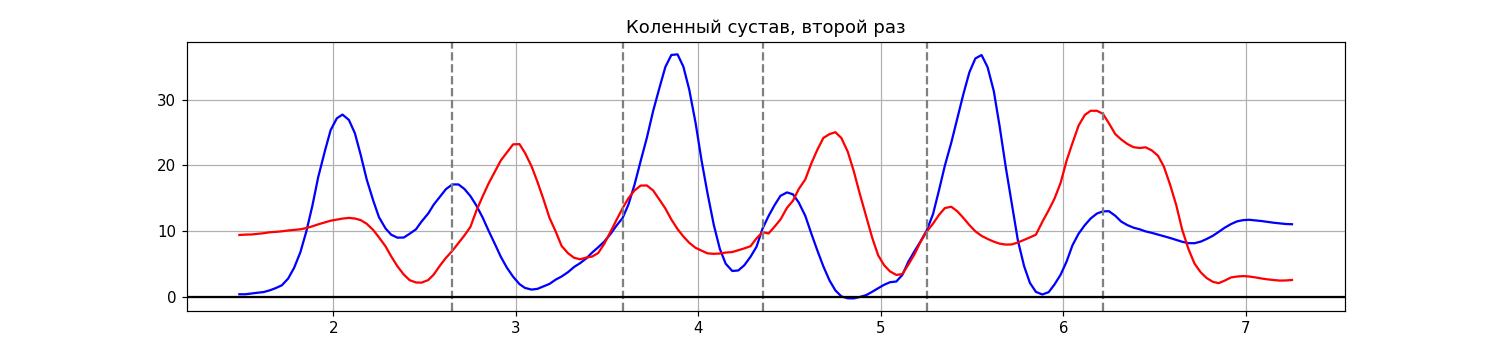

In [59]:
%matplotlib notebook
plt.title('Коленный сустав, второй раз')
plt.plot(s_time, s_knee[0], 'b')
plt.plot(s_time, s_knee[1], 'r')
for tim in s_timings:
    plt.axvline(x=tim, color='gray', linestyle='--')

plt.axhline(y=0, color='black')
plt.grid()

**Коленный сустав**    
Значительное улучшение в кинематике коленного сустава, на правой стороне появился устойчивый паттерн, близкий по форме к нормальному, однако со сниженной амплитудой сгибания в фазе переноса

<IPython.core.display.Javascript object>


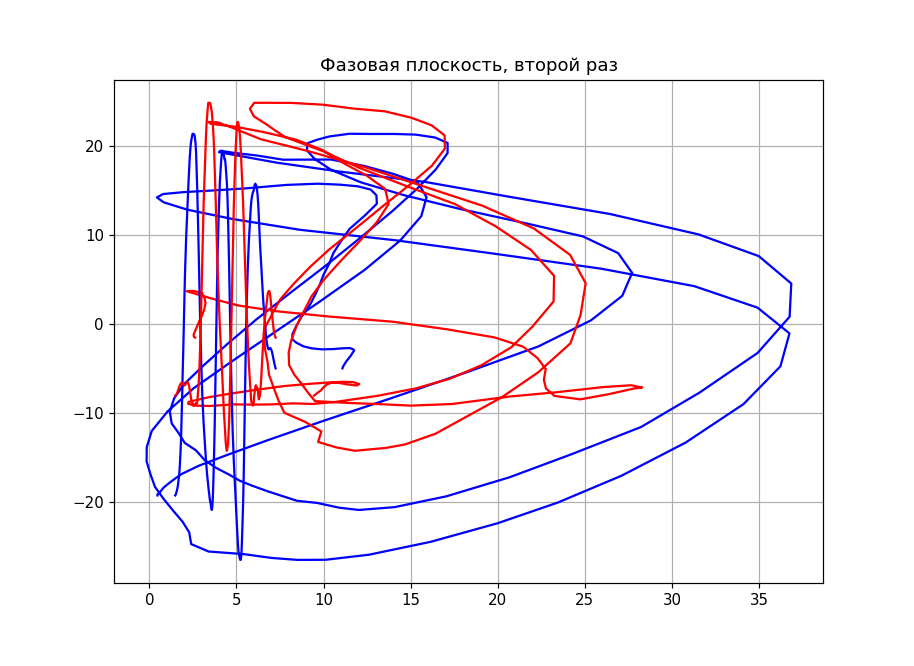

In [62]:
%matplotlib notebook
plt.title('Фазовая плоскость, второй раз')
plt.plot(s_knee[0], s_hip[0], 'b')
plt.plot(s_knee[1], s_hip[1], 'r')
plt.grid()

In [63]:
th_name = 'Ancheev/AncheevThird.csv'
th_data = read_data(th_name)

In [66]:
th_time, th_hip, th_knee, th_spine = cut_data(th_data, 1.5, 5.5)

<IPython.core.display.Javascript object>


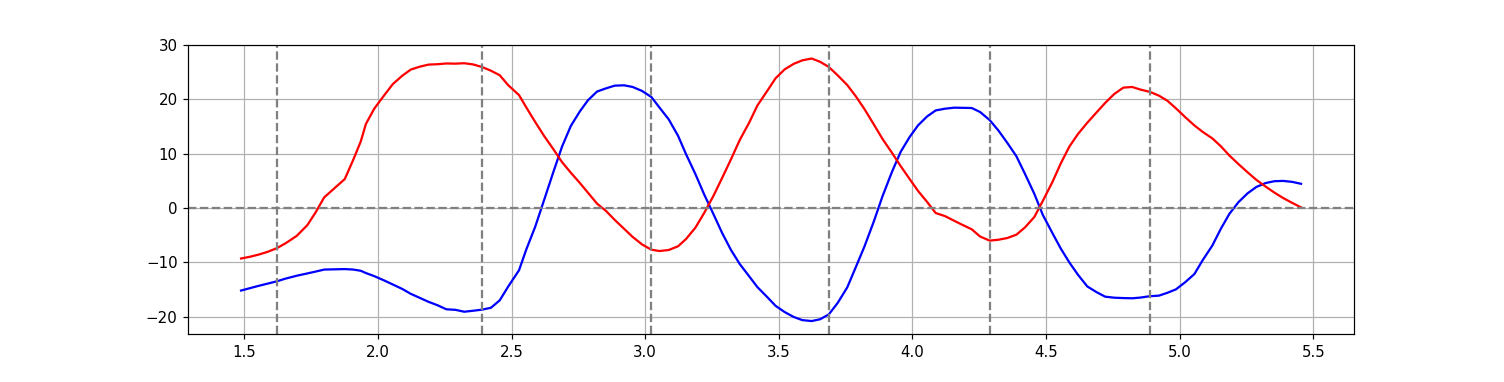

In [71]:
%matplotlib notebook
plt.plot(th_time, th_hip[0], 'b')
plt.plot(th_time, th_hip[1], 'r')
plot_timings(th_timings)
plt.grid()

**Тазобедренный сустав**    
Полностью отсутствует проблема двухскоростного режима. Амплитуда на правой стороне также снижена при разгибании.

<IPython.core.display.Javascript object>


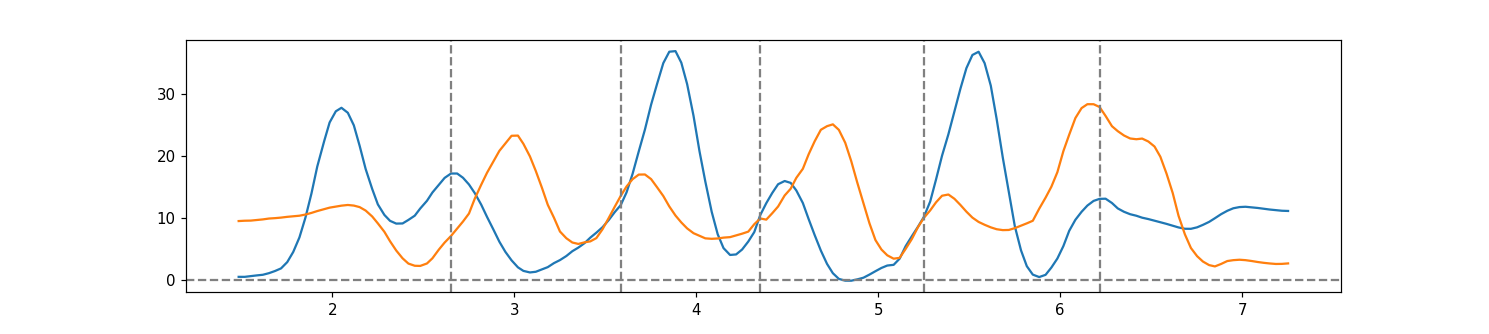

In [73]:
%matplotlib notebook
plt.plot(s_time, s_knee[0])
plt.plot(s_time, s_knee[1])
plot_timings(s_timings)

<IPython.core.display.Javascript object>


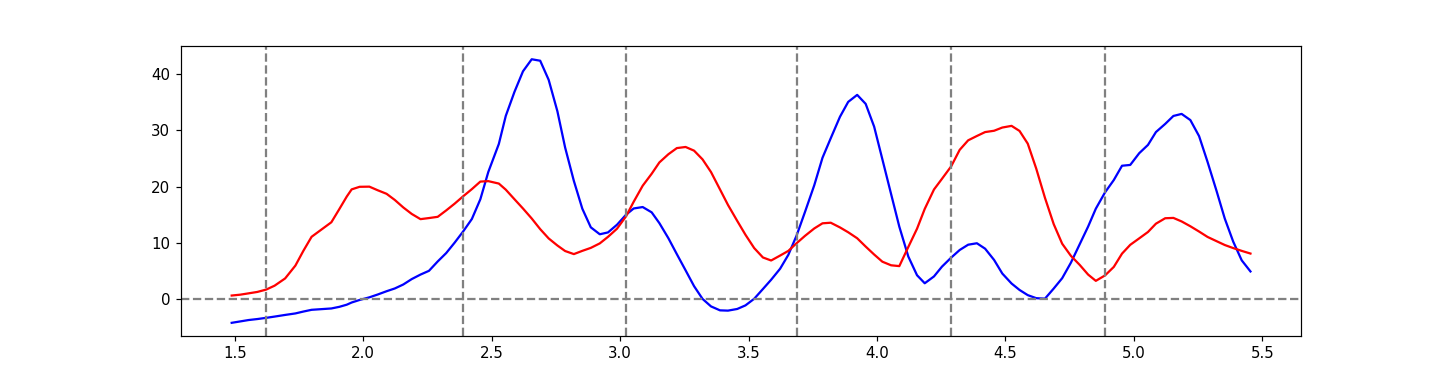

In [75]:
%matplotlib notebook
plt.plot(th_time, th_knee[0], 'b')
plt.plot(th_time, th_knee[1], 'r')
plot_timings(th_timings)

<IPython.core.display.Javascript object>


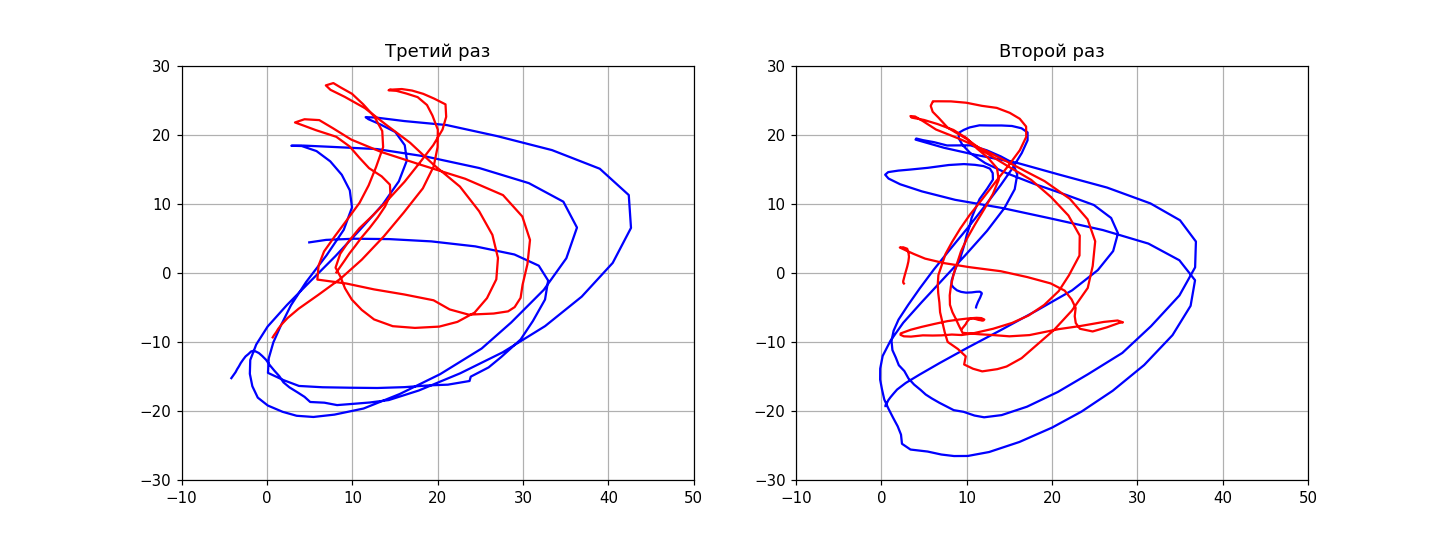

(-30, 30)

In [81]:
%matplotlib notebook
plt.subplot(121)
plt.title('Третий раз')
plt.plot(th_knee[0], th_hip[0], 'b')
plt.plot(th_knee[1], th_hip[1], 'r')
plt.xlim(-10, 50)
plt.ylim(-30, 30)
plt.grid()
plt.subplot(122)
plt.title('Второй раз')
plt.plot(s_knee[0], s_hip[0], 'b')
plt.plot(s_knee[1], s_hip[1], 'r')
plt.grid()
plt.xlim(-10, 50)
plt.ylim(-30, 30)

# Фазовый анализ